# Regresja Liniowa w ML

### Co to jest regresja liniowa ?

&nbsp;&nbsp;&nbsp;&nbsp;Regresja Liniowa jest prostym modelem statystycznym, przewidującym pewną wartość liczbową na podstawie jednej lub wielu zmiennych wejściowych za pomocą lini prostej.


&nbsp;&nbsp;&nbsp;&nbsp;Jest to nic innego jak funkcja liniowa
$$
y = mx + b
$$


&nbsp;&nbsp;&nbsp;&nbsp;lub dla większej liczby zmiennych:


$$
y = m_nx + ... + m_2x + m_1x + b
$$

&nbsp;&nbsp;&nbsp;&nbsp;gdzie $y$ jest naszym wynikiem, a parametry $m_i$ zmiennymi rozpatrywanymi w danym modelu


### Warunki jakie powinny spełniać dane w regresji liniowej

Aby zastosować regresję liniową, dane powinny spełniać następujące warunki:

1. **Liniowość**:
    - Relacja między zmienną zależną (y) a zmiennymi niezależnymi (X) powinna być liniowa.
    - Można sprawdzić patrząc na wykres lub korelację pomiędzy zmiennymi niezależnymi, a zależnymi

2. **Brak wielokolinearności**:
    - Zmienne ***niezależne*** nie powinny być silnie skorelowane ze sobą. Wielokolinearność może prowadzić do niestabilnych oszacowań współczynników, aby uniknąć przeuczenia.
    - Aby sprawdzić korelację między zmiennymi, należy utworzyć macierz korelacji.
    - Macierz korelacji można utworzyć używając metody .corr() na obiekcie DataFrame.*
3. **Homoskedastyczność**:

    - Oznacza, że wariancja błędów (reszty) modelu jest stała dla wszystkich poziomów zmiennych niezależnych. Innymi słowy, rozrzut reszt wokół linii regresji powinien być mniej więcej taki sam dla wszystkich wartości zmiennych niezależnych.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Załaduj dane
data = pd.read_csv('Salary_dataset.csv', index_col=0)

# Oblicz macierz korelacji
correlation_matrix = data.corr()

# Wyświetl macierz korelacji
print(correlation_matrix)

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


## Logika modelu

Model ten korzysta z najmniejszej sumy kwadratów odległości od wszystkich punktów.

Formalnie można przedstawić to jako równanie:

$$
    \hat{y} = XM
$$
gdzie $M$ jest właściwym modelem.

Na przykład:
$$
    \hat{y} = XM = \begin{bmatrix}
2 \\
4 \\
5 \\
7
\end{bmatrix} 
\begin{bmatrix}
0.65 \\
3 \end{bmatrix} 
$$
oznacza, że dla {2,4,5,7} lat doświadczenia w zawodzie, funkcja przyjmie równanie y = 3x + 0.65

Jednak, aby obsłużyć jeszcze wyraz wolny (bias), należy dodać kolumnę jedynek. 
$$
    \hat{y} = XM = \begin{bmatrix}
1&2 \\
1&4 \\
1&5 \\
1&7
\end{bmatrix} 
\begin{bmatrix}
0.65 \\
3 \end{bmatrix} 
$$

## Jak otrzymać optymalny model ?

Wystarczy skorzystać ze wzoru:
$$
M = (X^TX)^{-1}X^Ty
$$

Złożoność obliczeniowa tego wzoru wynosi $O(nd^2+d^3)$ gdzie $d$ to ilość danych użytych do treningu, a $n$ to liczba unikalnych cech (takich jak zarobki, wiek itp.)

## Przykładowe zastosowanie gotowego modelu

&nbsp;&nbsp;&nbsp;&nbsp;Dla prostego zestawu danych opisującego wartość **rocznych zarobków** oraz **doświadczenia zawodowego**, spóbujemy dokonać predykcji zarobków pewnej osoby na podstawie jej doświadczenia zawodowego.

In [3]:
import pandas as pd

dataset = pd.read_csv('Salary_dataset.csv', index_col=0)

print(dataset.info())
print(dataset.head(10))
print(dataset.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes
None
   YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0
5              3.0  56643.0
6              3.1  60151.0
7              3.3  54446.0
8              3.3  64446.0
9              3.8  57190.0
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000


### Podział na zbiór testowy i treningowy (1:3)

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(X)
print(y)
from sklearn.model_selection import train_test_split

# Podział danych na zbiór treningowy i testowy
# test_size=0.2 oznacza, że 25% danych zostanie użyte do testowania
# random_state=1 zapewnia powtarzalność podziału

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print(len(X_train), len(X_test), len(y_train), len(y_test))

[[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]
[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]
22 8 22 8


### Trening modelu

In [5]:
from sklearn.linear_model import LinearRegression
# Inicjalizacja modelu regresji liniowej
model = LinearRegression()

# Trenowanie modelu na zbiorze treningowym
model.fit(X_train, y_train)



LinearRegression()

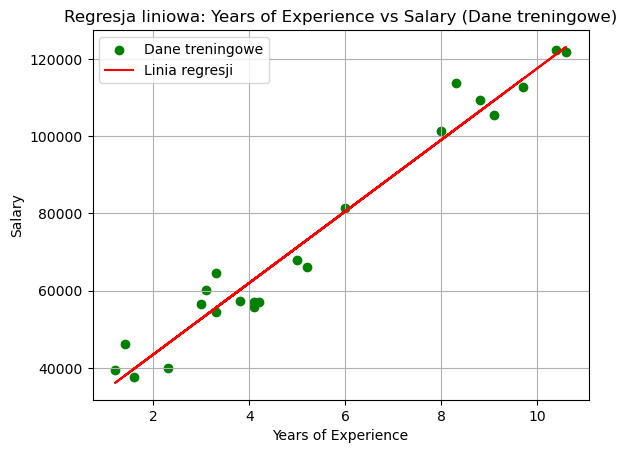

In [6]:
# Rysowanie punktów danych treningowych
plt.scatter(X_train, y_train, color='green', label='Dane treningowe')

# Rysowanie linii regresji
plt.plot(X_train, model.predict(X_train), color='red', label='Linia regresji')

# Dodanie tytułu i etykiet osi
plt.title('Regresja liniowa: Years of Experience vs Salary (Dane treningowe)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.grid(True)
plt.show()

### Użycie modelu na świeżych danych

In [7]:

# Przewidywanie wartości na zbiorze testowym
y_pred = model.predict(X_test)


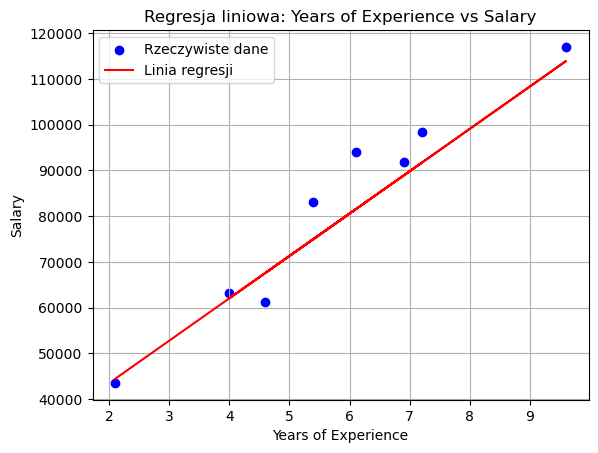

In [8]:
# Rysowanie punktów danych
plt.scatter(X_test, y_test, color='blue', label='Rzeczywiste dane')

# Rysowanie linii regresji
plt.plot(X_test, y_pred, color='red', label='Linia regresji')

# Dodanie tytułu i etykiet osi
plt.title('Regresja liniowa: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.grid(True)
plt.show()

In [9]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy of the model: {accuracy:.2f}")

Accuracy of the model: 0.92


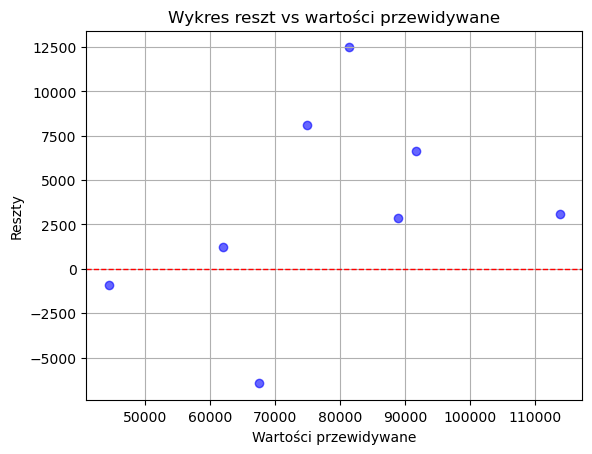

In [10]:
# Oblicz reszty (błędy modelu)
residuals = y_test - y_pred

# Wykres reszt w stosunku do wartości przewidywanych
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Wykres reszt vs wartości przewidywane')
plt.xlabel('Wartości przewidywane')
plt.ylabel('Reszty')
plt.grid(True)
plt.show()



**Zadanie.**
Napisz funkcję, która obliczy średni błąd powyższego modelu 
(czyli ile średnio brakuje do oczekiwanego rezultatu).

### Metryki do oceny modelu regresji liniowej

1. **R² (Współczynnik determinacji)**:
    - Mierzy, jaka część zmienności zmiennej zależnej (y) jest wyjaśniana przez zmienne niezależne (X).
    - Wartość R² mieści się w przedziale od 0 do 1:
      - R² = 1 oznacza idealne dopasowanie modelu.
      - R² = 0 oznacza, że model nie wyjaśnia żadnej zmienności danych.
    - Wzór:
      $$
      R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
      $$
      gdzie:
      - $SS_{res}$: suma kwadratów reszt (błędy modelu),
      - $SS_{tot}$: całkowita suma kwadratów (zmienność danych).

2. **R² adjusted (Skorygowany współczynnik determinacji)**:
    - Uwzględnia liczbę zmiennych w modelu i wielkość próby, co zapobiega sztucznemu zawyżeniu R² przy dodawaniu nowych zmiennych.
    - Jest bardziej wiarygodny w przypadku modeli z wieloma zmiennymi.
    - Wzór:
      $$
      R^2_{adjusted} = 1 - \left(1 - R^2\right) \frac{n - 1}{n - p - 1}
      $$
      gdzie:
      - \(n\): liczba obserwacji,
      - \(p\): liczba zmiennych niezależnych.

**Podsumowanie**:
- **R²**: Mierzy ogólną jakość dopasowania.
- **R² adjusted**: Uwzględnia złożoność modelu i jest bardziej odpowiedni dla modeli wielowymiarowych.

### Zadania
***Zadanie 1.***  Sprawdź, czy dane z pliku "Student_Performance.csv" nadają się do przeprowadzenia regresji liniowej.

***Zadanie 2.***  Używając podanego wzoru spróbuj wytrenować model, który znajdzie przybliżony "Performance index" na podstawie parametrów ucznia podanych w pliku "Student_Performance.csv" <br><br>
***Zadanie 3.*** Używając biblioteki sklearn.linear_model wytrenuj model z zadania pierwszego. <br><br>
***Zadanie 4*** Oblicz R^2 i R^2 adjusted modeli z poprzednich zadań.